In [15]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 14 14:16:04 2020

@author: thomas
"""

#MODULES
import os,sys
import re
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator)
from scipy.signal import savgol_filter
import pathlib
from matplotlib import animation
from IPython.display import display, Image, HTML

mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally
mpl.rcParams['contour.negative_linestyle'] = 'solid'

In [191]:
#Here we will create functions for each bifurcation Hamiltonian
def HeteroclinicBifurcation(x,y,a,beta):
    return (x*y**2 + a*x + beta*y)

def SuperPitchforkBifurcation(x,y,beta):
    return (x**2 + beta*y**2 + y**4)

def ReflectingUmbilicBifurcation(x,y,a,b,beta):
    return (a*x*y**2 + b*x**3 + beta*x)

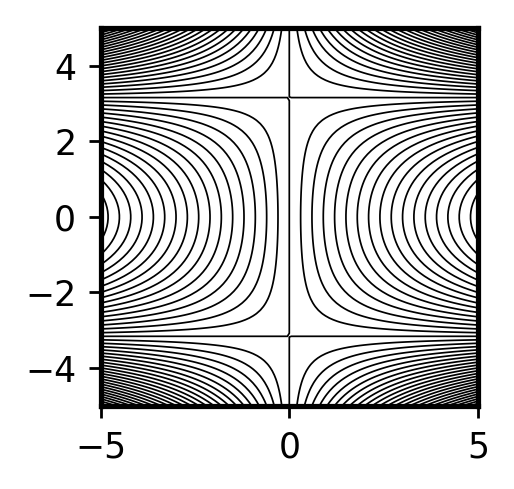

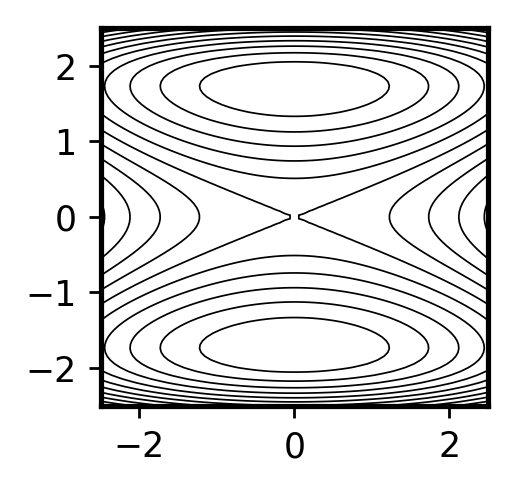

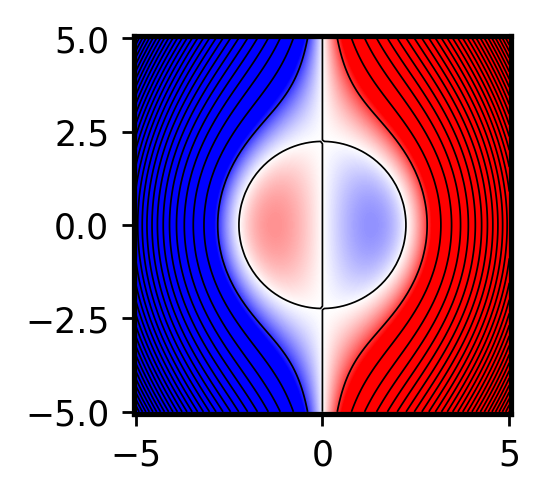

In [272]:
#Here we create x and y arrays and make a mesh out of them
#We also define a,b,beta

dx = 0.1
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
mx,my = np.meshgrid(x,y)

a = -10.0
beta = 0.0
HOB = HeteroclinicBifurcation(mx,my,a,beta)

xS = np.linspace(-2.5,2.5,100)
yS = np.linspace(-2.5,2.5,100)
mxS,myS = np.meshgrid(xS,yS)
beta = -1000.0
SuperPitchforkBifurcation(mxS,myS,beta)
a = 1.0
b = 1.0
beta = -5.0
RUB = ReflectingUmbilicBifurcation(mx,my,a,b,beta)

#Now we plot them individually 
#We will find the streamlines after

fig, ax = plt.subplots(nrows=1,ncols=1,num=1,figsize=(2,2),dpi=250)
fig2, ax2 = plt.subplots(nrows=1,ncols=1,num=2,figsize=(2,2),dpi=250)
fig3, ax3 = plt.subplots(nrows=1,ncols=1,num=3,figsize=(2,2),dpi=250)

levels = MaxNLocator(nbins=51).tick_values(-1.0*max(abs(HOB.min()),HOB.max()), max(abs(HOB.min()),HOB.max()))
#levels = np.linspace(-50,50,21)
ax.contour(mx,my,HOB,colors='k',extend='both',levels=levels,linewidths=0.5)
ax.set_aspect('equal')
#ax.imshow(HOB,cmap='bwr',extent=(-5.0 - 0.5*dx,5.0+0.5*dx,
#                                   -5.0-0.5*dx,5.0+0.5*dx),
#            origin='lower',vmin=-1.0,vmax=1.0,interpolation='bilinear')
#levels = MaxNLocator(nbins=41).tick_values(-1.0*max(abs(SupCPB.min()),SupCPB.max()), max(abs(SupCPB.min()),SupCPB.max()))
levels = np.linspace(-30,30,41)
ax2.contour(mxS,myS,SupCPB,colors='k',extend='both',levels=levels,linewidths=0.5)
#ax2.imshow(SupCPB,cmap='bwr',extent=(-5.0 - 0.5*dx,5.0+0.5*dx,
#                                   -5.0-0.5*dx,5.0+0.5*dx),
#            origin='lower',vmin=-1.0,vmax=1.0,interpolation='bilinear')
levels = MaxNLocator(nbins=61).tick_values(-1.0*max(abs(RUB.min()),RUB.max()), max(abs(RUB.min()),RUB.max()))
ax3.contour(mx,my,RUB,colors='k',extend='both',levels=levels,linewidths=0.5)
ax3.imshow(RUB,cmap='bwr',extent=(-5.0 - 0.5*dx,5.0+0.5*dx,
                                   -5.0-0.5*dx,5.0+0.5*dx),
            origin='lower',vmin=-10.0,vmax=10.0,interpolation='bilinear')
plt.show()
plt.close()

In [254]:
def SaddleCenterBifurcation(x,y,beta):
    #return y**3 + beta*y + (x-10)**2
    bif2 = (y-10)**3 + beta*(y-10) + (x-10)**2
    bif2 = np.where(abs(x-10.0) > 2.0, 0.0, bif2)
    bif2 = np.where(abs(y-10.0) > 2.0, 0.0, bif2)
    return bif2

def CombineBifurcations(x,y,a,beta1,beta2,shift1,shift2,dist1,dist2):
    bif1 = (x-shift1[0])*(y-shift1[1])**2 + a*(x-shift1[0]) + beta1*(y-shift1[1])
    #bif1 = np.where(abs(x-shift1[0]) > 10.0, 0.0, bif1)
    #bif1 = np.where(abs(y-shift1[1]) > 10.0, 0.0, bif1)
    bif2 = (y-shift2[1])**3 + beta2*(y-shift2[1]) + (x-shift2[0])**2
    #bif2 = np.where(abs(x-shift2[0]) > 10.0, 0.0, bif2)
    #bif2 = np.where(abs(y-shift2[1]) > 10.0, 0.0, bif2)
    return bif1*np.exp(-0.5*dist1 ) + bif2*np.exp(-0.5*dist2 )

8.259751196545995
4.302991268643827


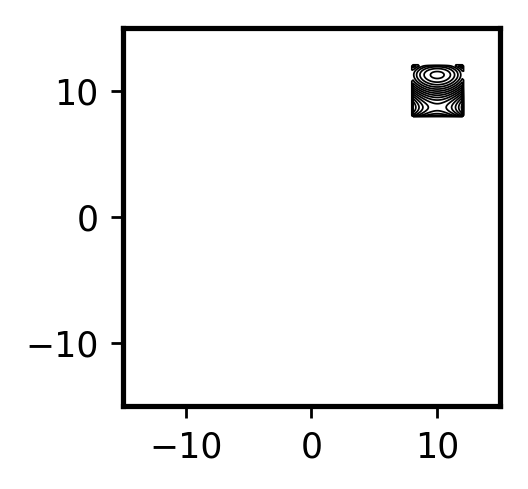

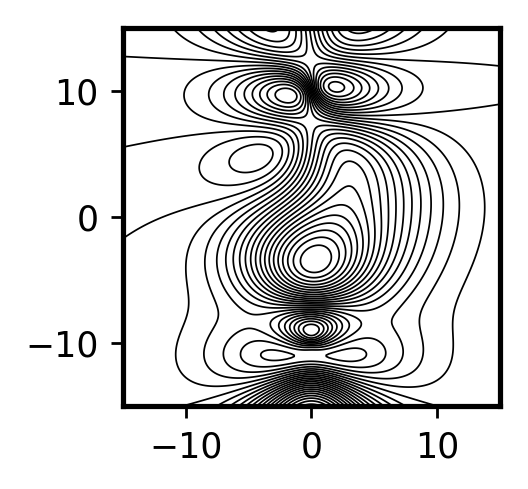

In [256]:
dx = 0.1
x = np.linspace(-15,15,300)
y = np.linspace(-15,15,300)
mx,my = np.meshgrid(x,y)

beta = -5.0
SCB = SaddleCenterBifurcation(mx,my,beta)
print(max(abs(SCB.min()),SCB.max()))
print(min(abs(SCB.min()),SCB.max()))

a = -6.0
beta1 = -2.0
beta2 = -5.0
shift1 = [0.0,10.0]
shift2 = [0.0,-10.0]
dist1 = np.hypot(mx-shift1[0],my-shift1[1])
dist2 = np.hypot(mx-shift2[0],my-shift2[1])
CB = CombineBifurcations(mx,my,a,beta1,beta2,shift1,shift2,dist1,dist2)

fig, ax = plt.subplots(nrows=1,ncols=1,num=1,figsize=(2,2),dpi=250)
fig2, ax2 = plt.subplots(nrows=1,ncols=1,num=2,figsize=(2,2),dpi=250)

levels = MaxNLocator(nbins=21).tick_values(-1.0*max(abs(SCB.min()),SCB.max()), max(abs(SCB.min()),SCB.max()))
#levels = np.linspace(-50,50,21)
ax.contour(mx,my,SCB,colors='k',extend='both',levels=levels,linewidths=0.5)
ax.set_aspect('equal')

levels = MaxNLocator(nbins=41).tick_values(-1.0*max(abs(CB.min()),CB.max()), max(abs(CB.min()),CB.max()))
#levels = np.linspace(-50,50,21)
ax2.contour(mx,my,CB,colors='k',extend='both',levels=levels,linewidths=0.5)
ax2.set_aspect('equal')
#ax2.imshow(CB,cmap='bwr',extent=(-15.0 - 0.5*dx,15.0+0.5*dx,
#                                   -15.0-0.5*dx,15.0+0.5*dx),
#            origin='lower',vmin=-10.0,vmax=10.0,interpolation='bilinear')

plt.show()
plt.close()